# Intial Look at the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
df = pd.read_csv('Building_Energy_Benchmarking.csv')
df.head()

/var/folders/lg/vpwp92v96rsbh9x3s5fyjd9w0000gn/T/ipykernel_79011/2371527380.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Building_Energy_Benchmarking.csv')


,X,Y,PID,SSL,PMPROPERTYID,PROPERTYNAME,PMPARENTPROPERTYID,PARENTPROPERTYNAME,REPORTINGYEAR,REPORTSTATUS,...,ELECTRICITYUSE_KBTU_JUNE,ELECTRICITYUSE_KBTU_JULY,ELECTRICITYUSE_KBTU_AUGUST,ELECTRICITYUSE_KBTU_SEPTEMBER,ELECTRICITYUSE_KBTU_OCTOBER,ELECTRICITYUSE_KBTU_NOVEMBER,ELECTRICITYUSE_KBTU_DECEMBER,UBID,LASTUPDATE,OBJECTID
0,-8.575303e+06,4.707303e+06,DC02220020,0222 0020,NaN,NaN,NaN,NaN,2021,Exempt from this year's disclosure,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024/09/12 04:00:00+00,3541768
1,-8.575227e+06,4.707286e+06,DC02220027,0222 0027,NaN,NaN,NaN,NaN,2021,Exempt from this year's disclosure,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024/04/14 04:00:00+00,3541769
2,-8.575234e+06,4.707311e+06,DC02220027,0222 0027,NaN,NaN,NaN,NaN,2022,Exempt from this year's disclosure,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024/04/14 04:00:00+00,3541770
3,-8.575281e+06,4.707161e+06,DC02230025,0223 0025,NaN,NaN,NaN,NaN,2012,No Report Received,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3541771
4,-8.575222e+06,4.707022e+06,DC02240824,0224 0824,NaN,NaN,NaN,NaN,2013,Exempt from this year's disclosure,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024/06/06 04:00:00+00,3541772


In [3]:
print(df.isna().sum())

X                                   0
Y                                   0
PID                                 0
SSL                                 0
PMPROPERTYID                     4353
                                ...  
ELECTRICITYUSE_KBTU_NOVEMBER     4049
ELECTRICITYUSE_KBTU_DECEMBER     4049
UBID                            26577
LASTUPDATE                       2543
OBJECTID                            0
Length: 73, dtype: int64


In [4]:
# Could Focus On University Level Eco Labels in DC
print(df['PRIMARYPROPERTYTYPE_SELFSELECT'].value_counts())

PRIMARYPROPERTYTYPE_SELFSELECT
Multifamily Housing           8593
Office                        6192
K-12 School                   1717
Hotel                         1135
College/University             496
                              ... 
Vocational School                1
Recreation                       1
Bank/Financial Institution       1
Movie Theater                    1
Other -Utility                   1
Name: count, Length: 79, dtype: int64


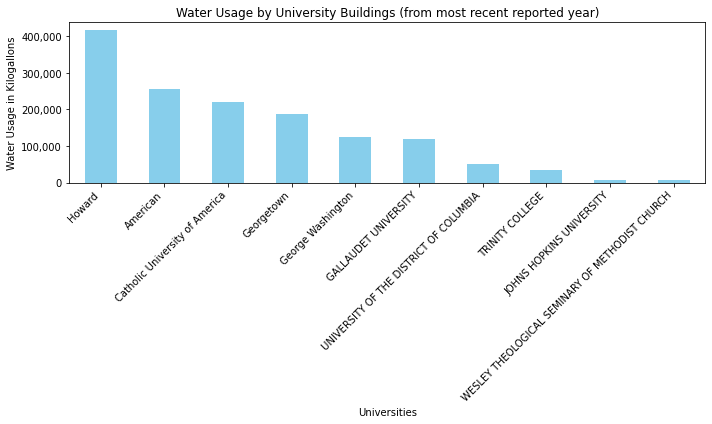

In [5]:
# Example Water Usage:
# Focus on university Buildings
df_ = df[df['PRIMARYPROPERTYTYPE_SELFSELECT'].isin(['College/University', 'College/University (Campus-Level)'])]

# Subset to most recent year for each address
idx = df_.groupby(['ADDRESSOFRECORD'])['REPORTINGYEAR'].idxmax()
df_ = df_.loc[idx]

df_['ADDRESSOFRECORD'] = df_['ADDRESSOFRECORD'].replace('4300 NEBRASKA AVENUE NW', '4300 NEBRASKA AVE NW')
df_['ADDRESSOFRECORD'] = df_['ADDRESSOFRECORD'].replace('4200 CONNECTICUT AVENUE NW', '4200 CONNECTICUT AVE NW')
df_['ADDRESSOFRECORD'] = df_['ADDRESSOFRECORD'].replace('401 MICHIGAN AVENUE NE', '401 MICHIGAN AVE NE')
df_['ADDRESSOFRECORD'] = df_['ADDRESSOFRECORD'].replace('3502 JOHN MCCORMACK ROAD NE', '3502 JOHN MCCORMACK RD NE')
df_['ADDRESSOFRECORD'] = df_['ADDRESSOFRECORD'].replace('3015 4TH ST NE', '3015 4TH ST')
df_['ADDRESSOFRECORD'] = df_['ADDRESSOFRECORD'].replace('2900 VAN NESS STREET NW', '2900 VAN NESS ST NW')
df_['ADDRESSOFRECORD'] = df_['ADDRESSOFRECORD'].replace('2600 6TH STREET NW', '2600 6TH ST NW')
df_['ADDRESSOFRECORD'] = df_['ADDRESSOFRECORD'].replace('4801 MASSACHUSETTS AV NW', '4801 MASSACHUSETTS AVE NW')
df_['ADDRESSOFRECORD'] = df_['ADDRESSOFRECORD'].replace('805 21ST ST NW', '805 21ST ST')
df_['ADDRESSOFRECORD'] = df_['ADDRESSOFRECORD'].replace('801 NORTH CAPITOL STREET NE', '801 NORTH CAPITOL ST NE')
df_['ADDRESSOFRECORD'] = df_['ADDRESSOFRECORD'].replace('800 FLORIDA AVE NE', '800 FLORIDA AV')
df_['ADDRESSOFRECORD'] = df_['ADDRESSOFRECORD'].replace('550 1ST ST NW', '550 1ST ST')
df_['ADDRESSOFRECORD'] = df_['ADDRESSOFRECORD'].replace('1307 L ST NW', '1307 L ST')
df_['ADDRESSOFRECORD'] = df_['ADDRESSOFRECORD'].replace('1251 6TH ST NE', '1251 6TH ST')
df_['ADDRESSOFRECORD'] = df_['ADDRESSOFRECORD'].replace('1311 L STREET NW', '1311 L ST NW')
df_['ADDRESSOFRECORD'] = df_['ADDRESSOFRECORD'].replace('125 MICHIGAN AVE NE', '125 MICHIGAN AV')
df_['ADDRESSOFRECORD'] = df_['ADDRESSOFRECORD'].replace('111 G STREET NW', '111 G ST NW')
df_['ADDRESSOFRECORD'] = df_['ADDRESSOFRECORD'].replace('101 F ST NW', '101 F ST')
df_['ADDRESSOFRECORD'] = df_['ADDRESSOFRECORD'].replace('1000 FLORIDA AVENUE NW', '1000 FLORIDA AVE NW')
df_['ADDRESSOFRECORD'] = df_['ADDRESSOFRECORD'].replace('1608 RHODE ISLAND AV NW', '1608 RHODE ISLAND AVENUE NW')
df_['ADDRESSOFRECORD'] = df_['ADDRESSOFRECORD'].replace('1608 RHODE ISLAND AVE NW', '1608 RHODE ISLAND AVENUE NW')
df_['ADDRESSOFRECORD'] = df_['ADDRESSOFRECORD'].replace('2139 GEORGIA AVE NW', '2139 GEORGIA AV NW')
df_['ADDRESSOFRECORD'] = df_['ADDRESSOFRECORD'].replace('2125 G STREET NW', '2125 G ST NW')
df_['ADDRESSOFRECORD'] = df_['ADDRESSOFRECORD'].replace('2100 FOXHALL ROAD NW', '2100 FOXHALL RD NW')

idx = df_.groupby(['ADDRESSOFRECORD'])['REPORTINGYEAR'].idxmax()
df_ = df_.loc[idx]

# Clean Owner names
df_['OWNEROFRECORD'] = df_['OWNEROFRECORD'].replace('THE GEORGE WASHINGTON UNIVERSITY', 'George Washington')
df_['OWNEROFRECORD'] = df_['OWNEROFRECORD'].replace('GEORGE WASHINGTON UNIVERSITY', 'George Washington')
df_['OWNEROFRECORD'] = df_['OWNEROFRECORD'].replace('HOWARD UNIVERSITY (LAND ONLY)', 'Howard')
df_['OWNEROFRECORD'] = df_['OWNEROFRECORD'].replace('HOWARD UNIVERSITY', 'Howard')
df_['OWNEROFRECORD'] = df_['OWNEROFRECORD'].replace('THE HOWARD UNIVERSITY', 'Howard')
df_['OWNEROFRECORD'] = df_['OWNEROFRECORD'].replace('THE CATHOLIC UNIVERSITY OF AMERICA', 'Catholic University of America')
df_['OWNEROFRECORD'] = df_['OWNEROFRECORD'].replace('GEORGETOWN UNIVERSITY', 'Georgetown')
df_['OWNEROFRECORD'] = df_['OWNEROFRECORD'].replace('GEORGETOWN COLLEGE LAW CENTER', 'Georgetown')
df_['OWNEROFRECORD'] = df_['OWNEROFRECORD'].replace('AMERICAN UNIVERSITY', 'American')
df_['OWNEROFRECORD'] = df_['OWNEROFRECORD'].replace('PRESIDENT & DIRECTORS OF GEORGETOWN UNIVERSITY', 'Georgetown')
df_['OWNEROFRECORD'] = df_['OWNEROFRECORD'].replace('JESUIT COMMUNITY AT GEORGETOWN UNIV INC', 'Georgetown')
df_['OWNEROFRECORD'] = df_['OWNEROFRECORD'].replace('THE PRESIDENT AND DIRECTORS OF GEORGETOWN COLLEGE', 'Georgetown')
df_['OWNEROFRECORD'] = df_['OWNEROFRECORD'].replace('CATHOLIC UNIVERSITY OF AMERICA', 'Catholic University of America')
df_['OWNEROFRECORD'] = df_['OWNEROFRECORD'].replace('DISTRICT OF COLUMBIA', 'UNIVERSITY OF THE DISTRICT OF COLUMBIA')

# Remove this owner
df_ = df_[df_['OWNEROFRECORD'] != 'LELAND STANFORD TRUSTEES C/O STANFORD MANAGEMENT COMPANY']

# Plot
sums = df_.groupby('OWNEROFRECORD')['WATERUSE_ALLWATERSOURCES_KGAL'].sum()
sums = sums.sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 6))
ax = sums.plot(kind='bar', color='skyblue')
plt.xlabel('Universities')

# Adjust rotation to 45 degrees to make labels diagonal and more readable
ax.set_xticklabels(sums.index, rotation=45, ha='right', size=10)

plt.ylabel('Water Usage in Kilogallons')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Water Usage by University Buildings (from most recent reported year)')

plt.tight_layout()
plt.show()


# Subsetting and Cleaning

In [6]:
# Subset Data by Universities
# Temporarily set display to show all rows
with pd.option_context('display.max_rows', None):
    print(df['PRIMARYPROPERTYTYPE_SELFSELECT'].value_counts())

PRIMARYPROPERTYTYPE_SELFSELECT
Multifamily Housing                                 8593
Office                                              6192
K-12 School                                         1717
Hotel                                               1135
College/University                                   496
Non-Refrigerated Warehouse                           333
Worship Facility                                     288
Residence Hall/Dormitory                             282
Mixed Use Property                                   262
Other - Public Services                              230
Fitness Center/Health Club/Gym                       203
Library                                              177
Fire Station                                         170
Other                                                164
Medical Office                                       157
Self-Storage Facility                                146
Other - Lodging/Residential                          132


In [7]:
with pd.option_context('display.max_rows', None):
    print(df['OWNEROFRECORD'].value_counts())

OWNEROFRECORD
DISTRICT OF COLUMBIA                                                      1787
GOVERNMENT OF THE DISTRICT OF COLUMBIA DEPARTMENT OF GENERAL SERVICES     1548
DISTRICT OF COLUMBIA HOUSING AUTHORITY                                     680
GEORGE WASHINGTON UNIVERSITY                                               269
HOWARD UNIVERSITY                                                          233
COLUMBIA REALTY VENTURE LLC                                                114
WASHINGTON METROPOLITAN AREA TRANSIT AUTHORITY (WMATA)                      97
HOWARD UNIVERSITY (LAND ONLY)                                               95
TERRENO V STREET LLC                                                        86
SMC UNITED INDUSTRIAL LIMITED PARTNERSHIP                                   83
ROMAN CATHOLIC ARCHBISHOP OF WASHINGTON                                     74
ALONZO O BLISS PROPERTIES                                                   72
THE CATHOLIC UNIVERSITY OF AMERICA    

In [8]:
# Define the property types and the keywords to check in OWNEROFRECORD
property_types = ['College/University', 'College/University (Campus-Level)', 'Residence Hall/Dormitory']
owner_keywords = ['George Washington', 'Howard', 'Georgetown University,' 'American University', 'Catholic University', 'University']  
# Create a boolean mask for the OWNEROFRECORD condition
owner_mask = df['OWNEROFRECORD'].str.contains('|'.join(owner_keywords), na=False)

# Filter the DataFrame based on either condition
df1 = df[df['PRIMARYPROPERTYTYPE_SELFSELECT'].isin(property_types) | owner_mask]
with pd.option_context('display.max_rows', None):
    print(df1.isna().sum())

X                                   0
Y                                   0
PID                                 0
SSL                                 0
PMPROPERTYID                        0
PROPERTYNAME                        0
PMPARENTPROPERTYID                418
PARENTPROPERTYNAME                418
REPORTINGYEAR                       0
REPORTSTATUS                        0
ADDRESSOFRECORD                     0
OWNEROFRECORD                       0
WARD                                8
REPORTEDADDRESS                     0
CITY                               10
STATE                              10
POSTALCODE                         77
YEARBUILT                           8
PRIMARYPROPERTYTYPE_SELFSELECT      0
PRIMARYPROPERTYTYPE_EPACALC        48
TAXRECORDFLOORAREA                  0
REPORTEDBUILDINGGROSSFLOORAREA      0
ENERGYSTARSCORE                   546
SITEEUI_KBTU_FT                     0
WEATHERNORMALZEDSITEEUI_KBTUFT      0
SOURCEEUI_KBTU_FT                   0
WEATHERNORMA

In [9]:
df1 = df1.drop(['UBID'], axis=1)

In [10]:
df1[df1['OWNEROFRECORD'] == "GEORGETOWN UNIVERSITY"][['REPORTINGYEAR', 'OWNEROFRECORD', 'WARD', 'REPORTEDADDRESS', 'YEARBUILT',
    'PRIMARYPROPERTYTYPE_SELFSELECT', 'PRIMARYPROPERTYTYPE_EPACALC',
    'TAXRECORDFLOORAREA', 'REPORTEDBUILDINGGROSSFLOORAREA', 
    'ENERGYSTARSCORE', 'SITEEUI_KBTU_FT', 
    'WEATHERNORMALZEDSITEEUI_KBTUFT', 'SOURCEEUI_KBTU_FT', 
    'WEATHERNORMALZEDSOUREUI_KBTUFT', 'TOTGHGEMISSIONS_METRICTONSCO2E', 
    'TOTGHGEMISSINTENSITY_KGCO2EFT', 'WATERUSE_ALLWATERSOURCES_KGAL', 
    'METEREDAREAS_ENERGY', 'NATURALGASUSE_THERMS', 
    'FUELOILANDDIESELFUELUSEKBTU'
]]


,REPORTINGYEAR,OWNEROFRECORD,WARD,REPORTEDADDRESS,YEARBUILT,PRIMARYPROPERTYTYPE_SELFSELECT,PRIMARYPROPERTYTYPE_EPACALC,TAXRECORDFLOORAREA,REPORTEDBUILDINGGROSSFLOORAREA,ENERGYSTARSCORE,SITEEUI_KBTU_FT,WEATHERNORMALZEDSITEEUI_KBTUFT,SOURCEEUI_KBTU_FT,WEATHERNORMALZEDSOUREUI_KBTUFT,TOTGHGEMISSIONS_METRICTONSCO2E,TOTGHGEMISSINTENSITY_KGCO2EFT,WATERUSE_ALLWATERSOURCES_KGAL,METEREDAREAS_ENERGY,NATURALGASUSE_THERMS,FUELOILANDDIESELFUELUSEKBTU
7924,2012,GEORGETOWN UNIVERSITY,6.0,120 F St.,1992.0,Residence Hall/Dormitory,Residence Hall/Dormitory,242217,225264.0,63.0,52.8,52.7,138.7,132.7,1357.64,0.0,0.0,No Selection Made,37040.90000,0.0
7925,2013,GEORGETOWN UNIVERSITY,6.0,120 F St.,1992.0,Residence Hall/Dormitory,Residence Hall/Dormitory,242217,225264.0,66.0,52.5,52.8,128.6,129.0,1268.00,5.6,5504.2,Whole Building,39035.70043,0.0
7926,2014,GEORGETOWN UNIVERSITY,6.0,120 F St.,1992.0,Residence Hall/Dormitory,Residence Hall/Dormitory,242217,225264.0,64.0,54.7,54.1,132.4,131.4,1306.50,5.8,4757.6,Whole Building,42478.60012,0.0
7927,2015,GEORGETOWN UNIVERSITY,6.0,120 F St.,1992.0,Residence Hall/Dormitory,Residence Hall/Dormitory,242217,225264.0,67.0,51.4,51.0,127.9,125.7,1258.30,5.6,5412.2,Whole Building,35999.49540,0.0
7928,2016,GEORGETOWN UNIVERSITY,6.0,120 F St.,1992.0,Residence Hall/Dormitory,Residence Hall/Dormitory,242228,225264.0,72.0,47.7,48.3,120.5,120.2,1037.80,4.6,6437.7,Whole Building,31602.39808,0.0
7929,2017,GEORGETOWN UNIVERSITY,6.0,120 F St.,1992.0,Residence Hall/Dormitory,Residence Hall/Dormitory,242228,225264.0,67.0,48.1,49.5,121.5,122.2,1017.90,4.5,5878.6,Whole Building,32021.30069,0.0
8563,2013,GEORGETOWN UNIVERSITY,6.0,111 G Street,1987.0,College/University,College/University,148385,150176.0,NaN,68.9,68.9,216.2,216.2,1384.30,9.2,1273.2,Whole Building,0.00000,0.0
8564,2014,GEORGETOWN UNIVERSITY,6.0,111 G Street,1987.0,College/University,College/University,148385,150176.0,NaN,66.6,66.6,209.2,209.2,1339.10,8.9,1745.2,Whole Building,0.00000,0.0
8565,2015,GEORGETOWN UNIVERSITY,6.0,111 G Street,1987.0,College/University,College/University,148385,150176.0,NaN,64.6,64.6,202.9,202.9,1299.30,8.7,1728.7,Whole Building,0.00000,0.0
8566,2016,GEORGETOWN UNIVERSITY,6.0,111 G Street,1987.0,College/University,College/University,148385,150176.0,NaN,68.5,68.5,215.0,215.0,1179.10,7.9,1864.1,Whole Building,0.00000,0.0


In [11]:
# Cleaning University Names
df1['OWNEROFRECORD'] = df1['OWNEROFRECORD'].replace('THE GEORGE WASHINGTON UNIVERSITY', 'George Washington University')
df1['OWNEROFRECORD'] = df1['OWNEROFRECORD'].replace('GEORGE WASHINGTON UNIVERSITY', 'George Washington University')
df1['OWNEROFRECORD'] = df1['OWNEROFRECORD'].replace('HOWARD UNIVERSITY (LAND ONLY)', 'Howard University')
df1['OWNEROFRECORD'] = df1['OWNEROFRECORD'].replace('HOWARD UNIVERSITY', 'Howard University')
df1['OWNEROFRECORD'] = df1['OWNEROFRECORD'].replace('THE HOWARD UNIVERSITY', 'Howard University')
df1['OWNEROFRECORD'] = df1['OWNEROFRECORD'].replace('THE HOWARD UNIVERSITY INC', 'Howard University')
df1['OWNEROFRECORD'] = df1['OWNEROFRECORD'].replace('HOWARD DORMITORY HOLDINGS 1 LLC', 'Howard University')
df1['OWNEROFRECORD'] = df1['OWNEROFRECORD'].replace('THE CATHOLIC UNIVERSITY OF AMERICA', 'Catholic University of America')
df1['OWNEROFRECORD'] = df1['OWNEROFRECORD'].replace('GEORGETOWN UNIVERSITY', 'Georgetown University')
df1['OWNEROFRECORD'] = df1['OWNEROFRECORD'].replace('GEORGETOWN COLLEGE LAW CENTER', 'Georgetown University')
df1['OWNEROFRECORD'] = df1['OWNEROFRECORD'].replace('AMERICAN UNIVERSITY', 'American University')
df1['OWNEROFRECORD'] = df1['OWNEROFRECORD'].replace('PRESIDENT & DIRECTORS OF GEORGETOWN UNIVERSITY', 'Georgetown University')
df1['OWNEROFRECORD'] = df1['OWNEROFRECORD'].replace('JESUIT COMMUNITY AT GEORGETOWN UNIV INC', 'Georgetown University')
df1['OWNEROFRECORD'] = df1['OWNEROFRECORD'].replace('THE PRESIDENT AND DIRECTORS OF GEORGETOWN COLLEGE', 'Georgetown University')
df1['OWNEROFRECORD'] = df1['OWNEROFRECORD'].replace('CATHOLIC UNIVERSITY OF AMERICA', 'Catholic University of America')
df1['OWNEROFRECORD'] = df1['OWNEROFRECORD'].replace('UNIVERSITY OF THE DISTRICT OF COLUMBIA', 'University of District of Columbia')
df1['OWNEROFRECORD'] = df1['OWNEROFRECORD'].replace('TRINITY COLLEGE', 'Trinity College')
df1['OWNEROFRECORD'] = df1['OWNEROFRECORD'].replace('GALLAUDET UNIVERSITY', 'Gallaudet University')

In [12]:
# Subsetting for Common Universities
df1 = df1[df1['OWNEROFRECORD'].isin(['George Washington University', 'Howard University', 'Catholic University of America', 
                                     'Georgetown University', 'American University', 'University of District of Columbia', 'Trinity College', 'Gallaudet University'])]
df1.shape

(618, 72)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Chart Function
def plot_colleges_use(df, institutions, numeric_variable, year):
    """
    Plots total water use for specific institutions based on a specified numeric variable for a specific year.

    Parameters:
    - df (pd.DataFrame): The dataframe containing data.
    - institutions (list): A list of institution names to filter by.
    - numeric_variable (str): The name of the numeric column to aggregate and plot.
    - year (int): The year to filter the data by.

    """
    # Filter the dataframe for specified institutions and the specified year
    filtered_df = df[df['OWNEROFRECORD'].isin(institutions)]
    filtered_df = filtered_df[filtered_df['REPORTINGYEAR'] == year]

    # Group by OWNEROFRECORD and sum the specified numeric variable
    data = filtered_df.groupby('OWNEROFRECORD')[numeric_variable].sum().reindex(institutions)

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x=data.index, y=data.values, palette="viridis")
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Institution')
    plt.ylabel(f'Total {numeric_variable.replace("_", " ").title()}')
    plt.title(f'{numeric_variable.replace("_", " ").title()} by Institution in {year}')
    plt.tight_layout()
    plt.show()

/var/folders/lg/vpwp92v96rsbh9x3s5fyjd9w0000gn/T/ipykernel_79011/3448189129.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette="viridis")


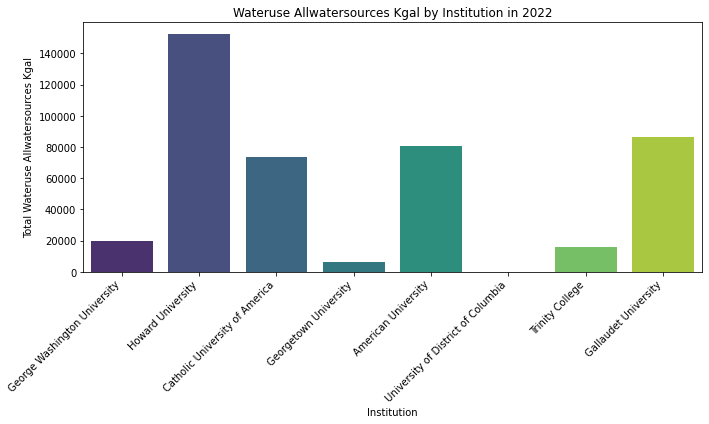

/var/folders/lg/vpwp92v96rsbh9x3s5fyjd9w0000gn/T/ipykernel_79011/3448189129.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette="viridis")


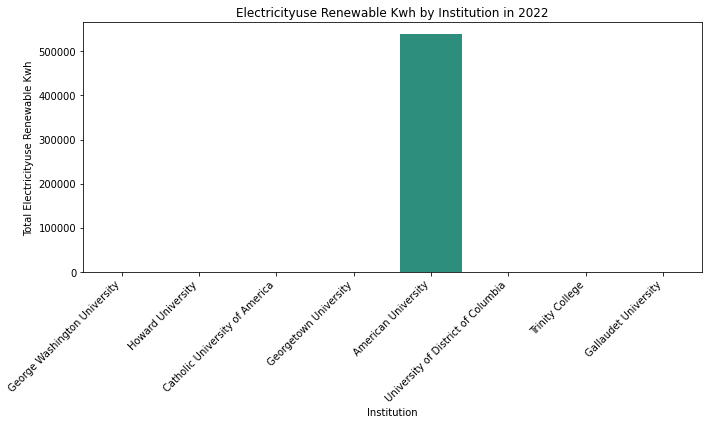

/var/folders/lg/vpwp92v96rsbh9x3s5fyjd9w0000gn/T/ipykernel_79011/3448189129.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette="viridis")


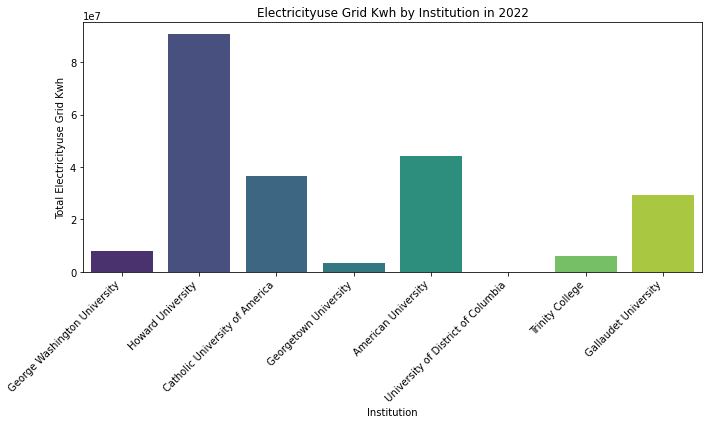

/var/folders/lg/vpwp92v96rsbh9x3s5fyjd9w0000gn/T/ipykernel_79011/3448189129.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette="viridis")


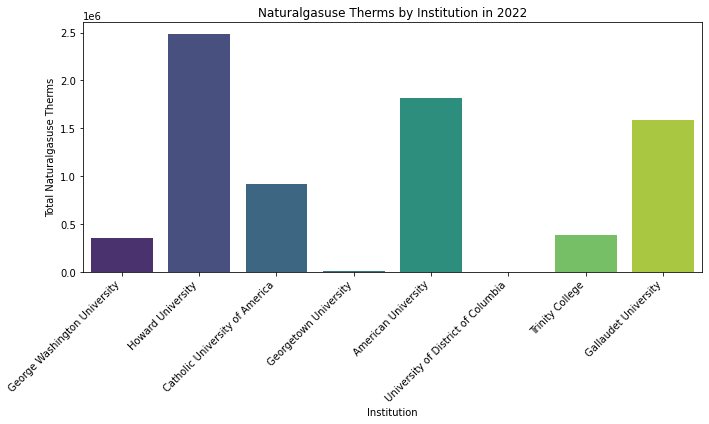

/var/folders/lg/vpwp92v96rsbh9x3s5fyjd9w0000gn/T/ipykernel_79011/3448189129.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette="viridis")


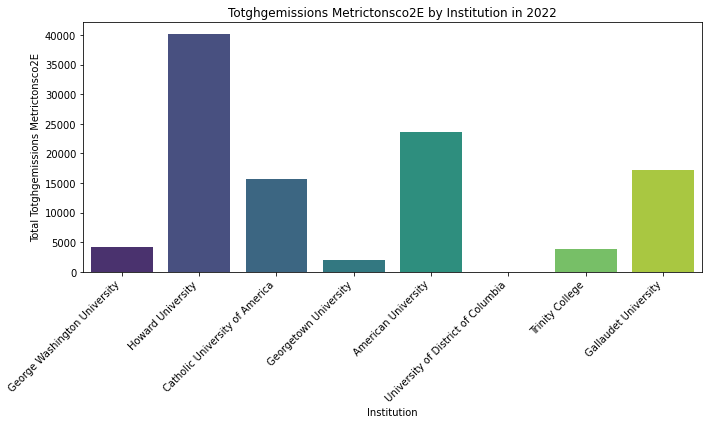

/var/folders/lg/vpwp92v96rsbh9x3s5fyjd9w0000gn/T/ipykernel_79011/3448189129.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette="viridis")


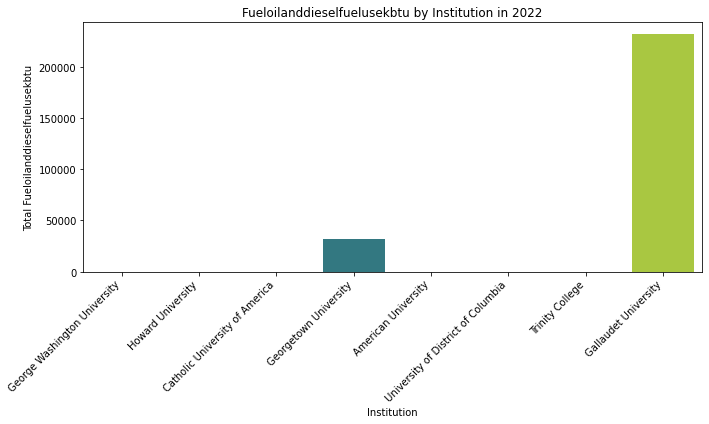

In [14]:
colleges = ['George Washington University', 'Howard University', 'Catholic University of America',
    'Georgetown University', 'American University', 'University of District of Columbia',
    'Trinity College', 'Gallaudet University']

# Counting Variables
plot_colleges_use(df1, colleges, 'WATERUSE_ALLWATERSOURCES_KGAL', 2022)
plot_colleges_use(df1, colleges, 'ELECTRICITYUSE_RENEWABLE_KWH', 2022)
plot_colleges_use(df1, colleges, 'ELECTRICITYUSE_GRID_KWH', 2022)
plot_colleges_use(df1, colleges, 'NATURALGASUSE_THERMS', 2022) 
plot_colleges_use(df1, colleges, 'TOTGHGEMISSIONS_METRICTONSCO2E', 2022)
plot_colleges_use(df1, colleges, 'FUELOILANDDIESELFUELUSEKBTU', 2022)

In [15]:
print(df1.isna().sum())
(df1 == 0).sum() 

X                               0
Y                               0
PID                             0
SSL                             0
PMPROPERTYID                    0
                               ..
ELECTRICITYUSE_KBTU_OCTOBER     0
ELECTRICITYUSE_KBTU_NOVEMBER    0
ELECTRICITYUSE_KBTU_DECEMBER    0
LASTUPDATE                      0
OBJECTID                        0
Length: 72, dtype: int64


X                                 0
Y                                 0
PID                               0
SSL                               0
PMPROPERTYID                      0
                               ... 
ELECTRICITYUSE_KBTU_OCTOBER     544
ELECTRICITYUSE_KBTU_NOVEMBER    544
ELECTRICITYUSE_KBTU_DECEMBER    544
LASTUPDATE                        0
OBJECTID                          0
Length: 72, dtype: int64